In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset
data = pd.read_csv(r"C:\Users\HAI\Downloads\Neural networks\Neural networks\Alphabets_data.csv")
df = pd.DataFrame(data)
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [40]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.get_logger().setLevel("ERROR")


In [41]:
#checking for the null values
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [42]:
#checking for the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   letter  20000 non-null  int64
 1   xbox    20000 non-null  int64
 2   ybox    20000 non-null  int64
 3   width   20000 non-null  int64
 4   height  20000 non-null  int64
 5   onpix   20000 non-null  int64
 6   xbar    20000 non-null  int64
 7   ybar    20000 non-null  int64
 8   x2bar   20000 non-null  int64
 9   y2bar   20000 non-null  int64
 10  xybar   20000 non-null  int64
 11  x2ybar  20000 non-null  int64
 12  xy2bar  20000 non-null  int64
 13  xedge   20000 non-null  int64
 14  xedgey  20000 non-null  int64
 15  yedge   20000 non-null  int64
 16  yedgex  20000 non-null  int64
dtypes: int64(17)
memory usage: 2.6 MB


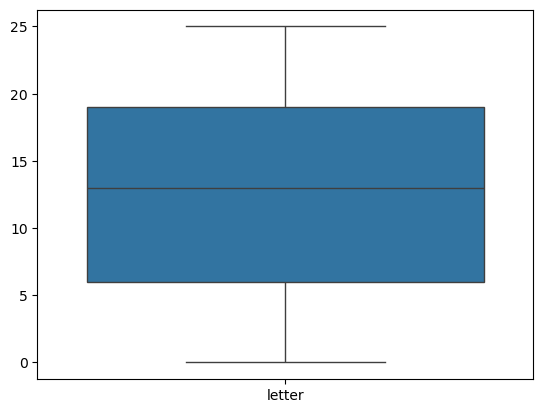

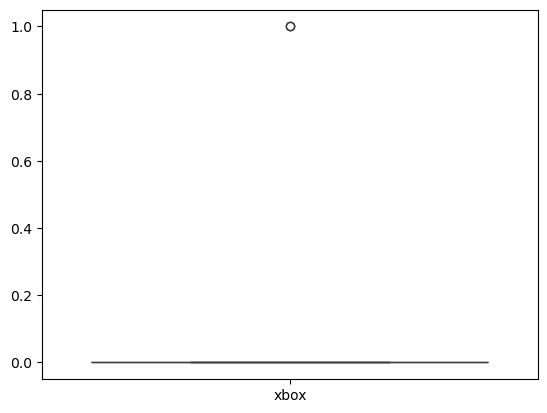

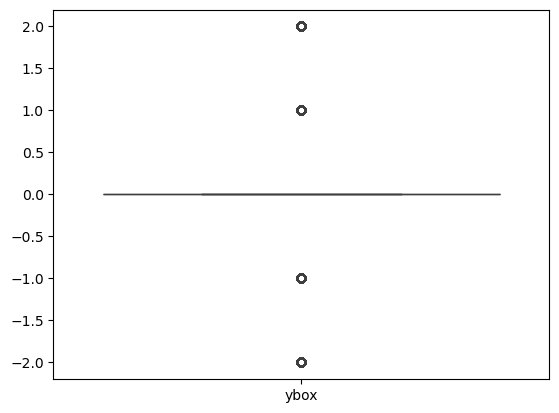

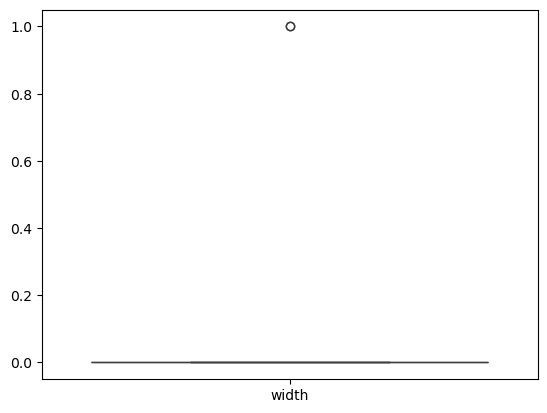

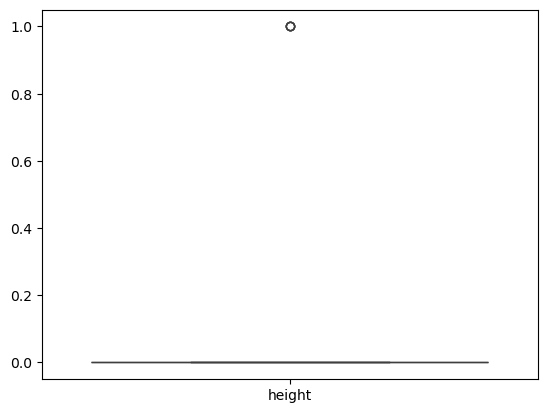

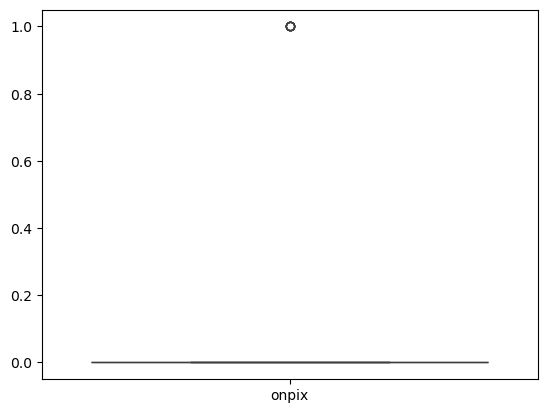

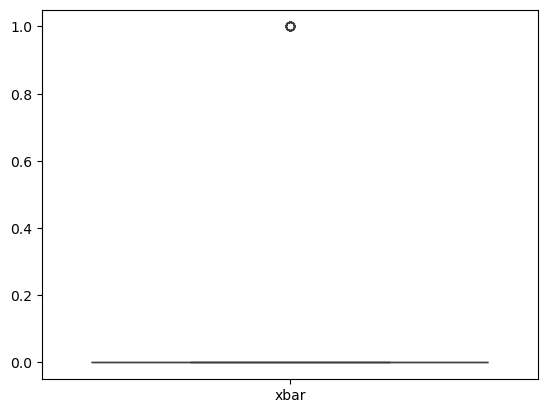

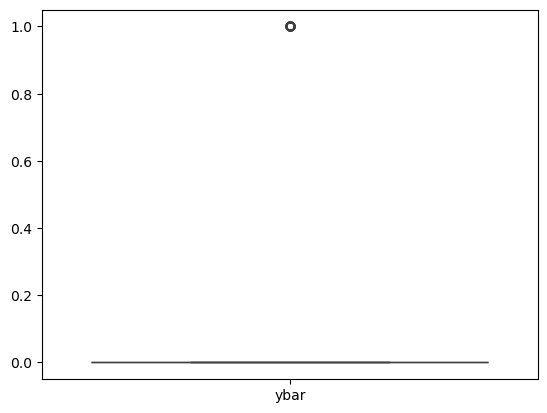

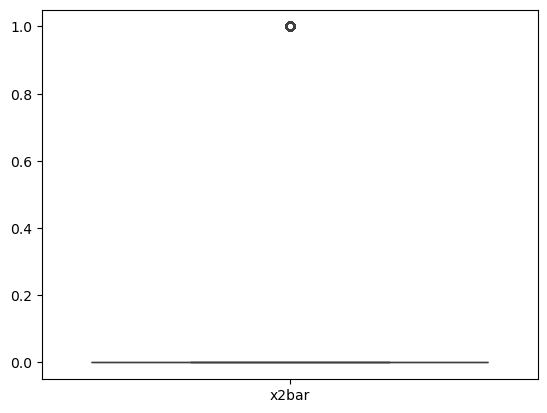

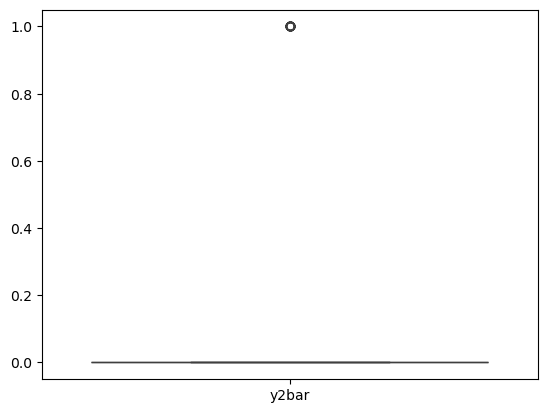

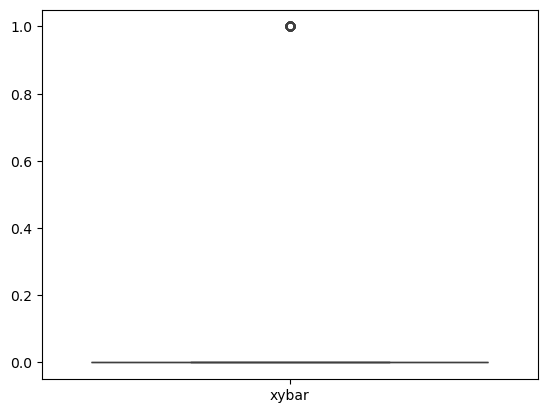

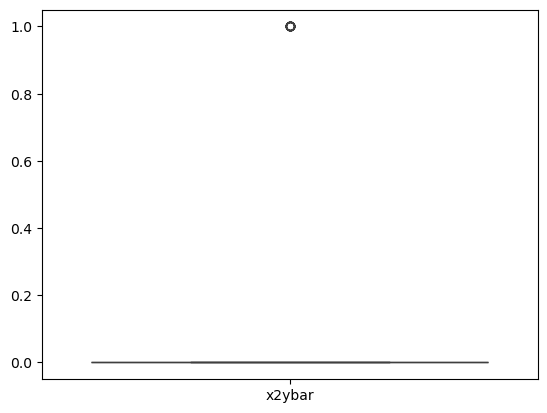

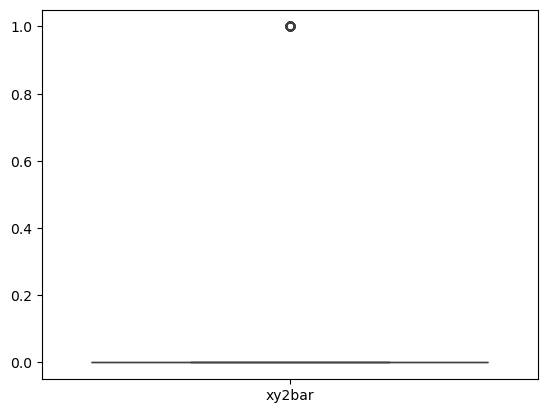

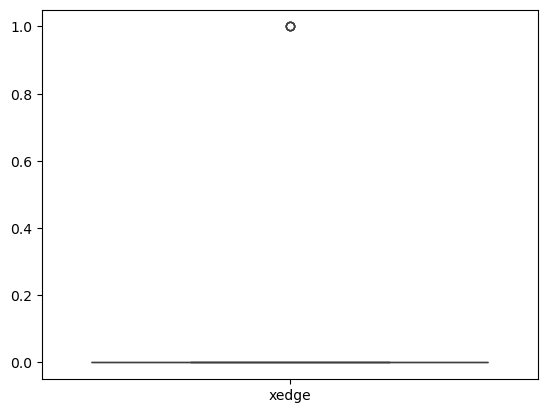

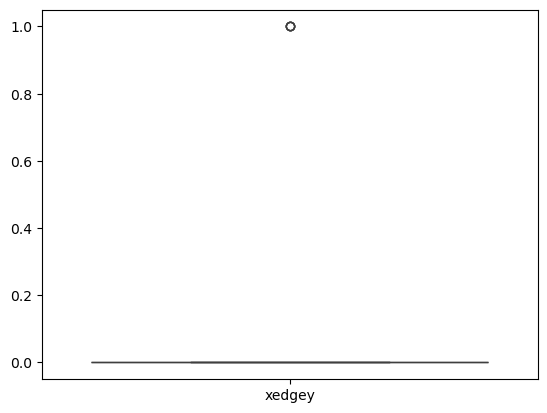

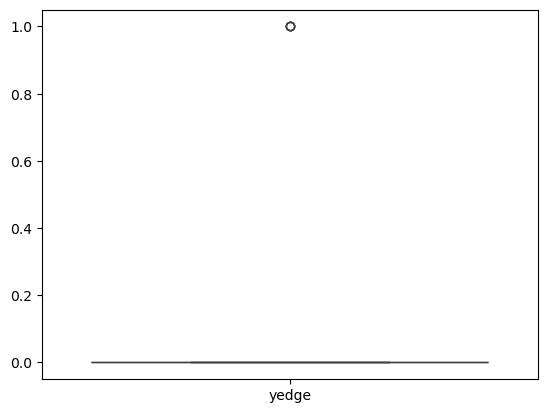

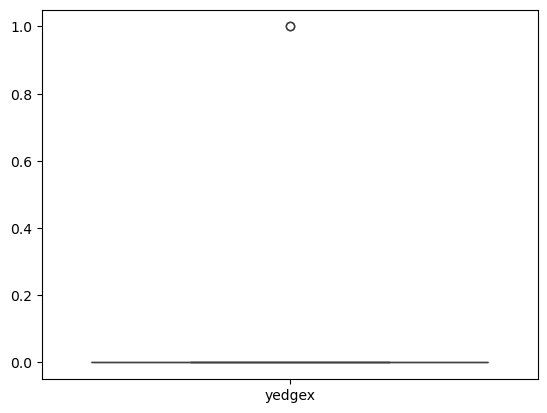

In [43]:
#checking for the outliers
for col in df.select_dtypes(include = 'number'):
    sns.boxplot(df[[col]])
    plt.show()

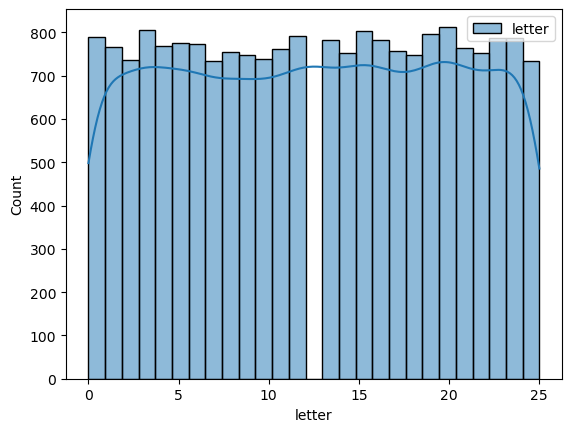

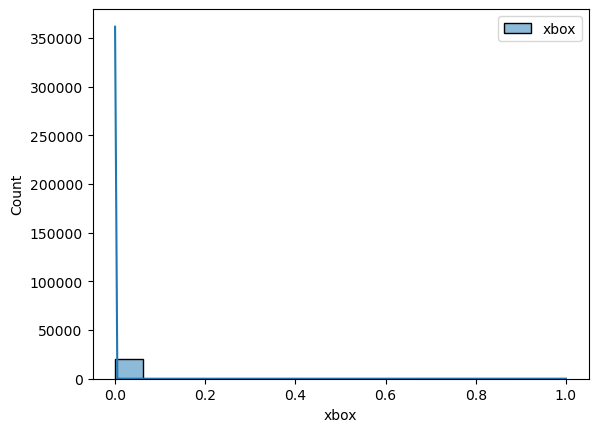

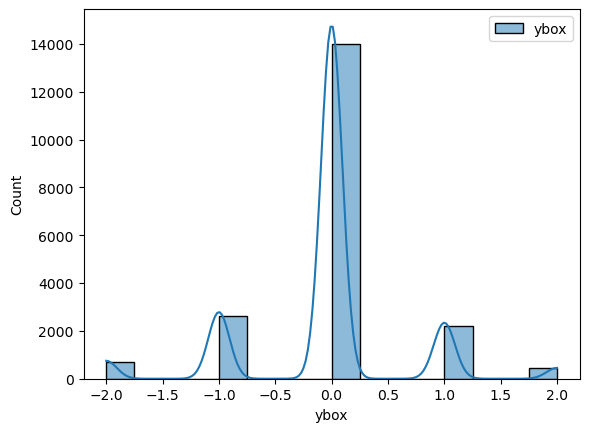

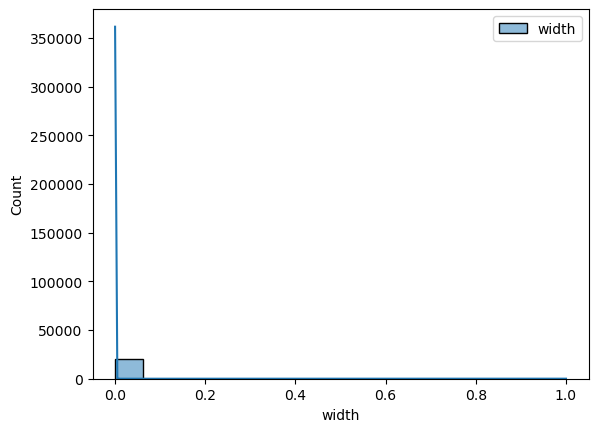

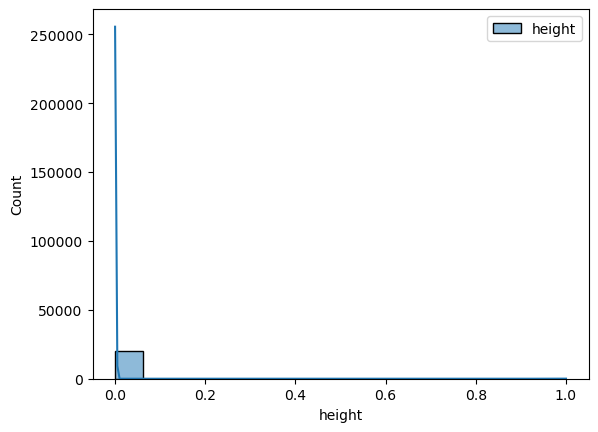

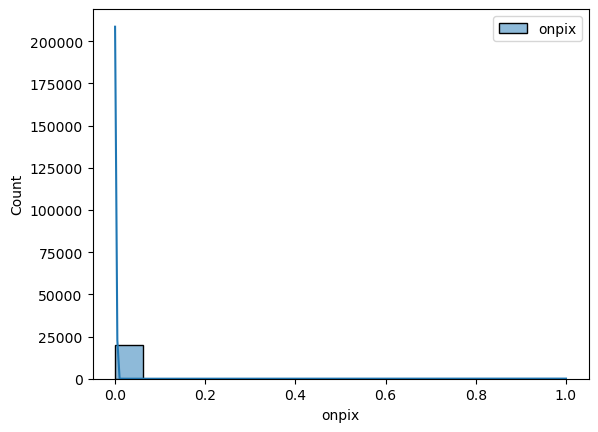

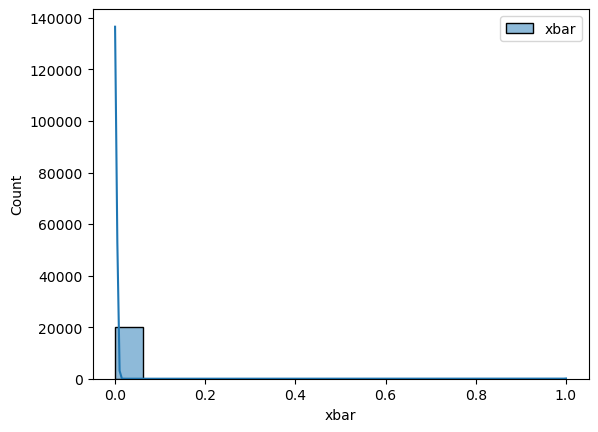

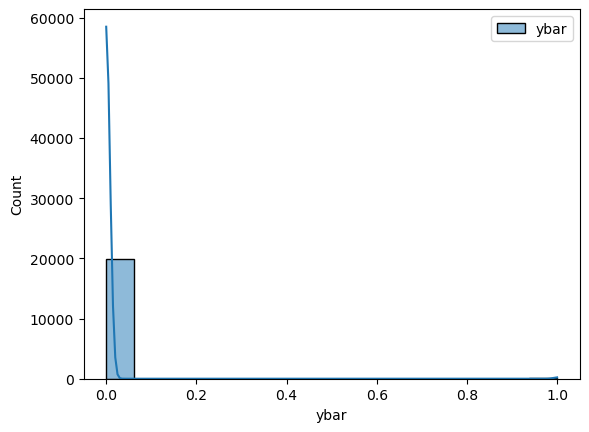

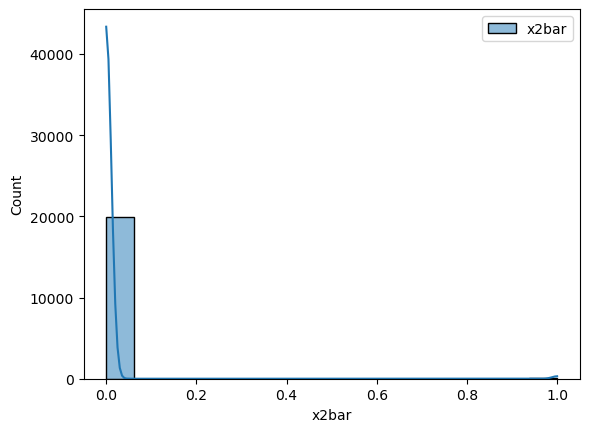

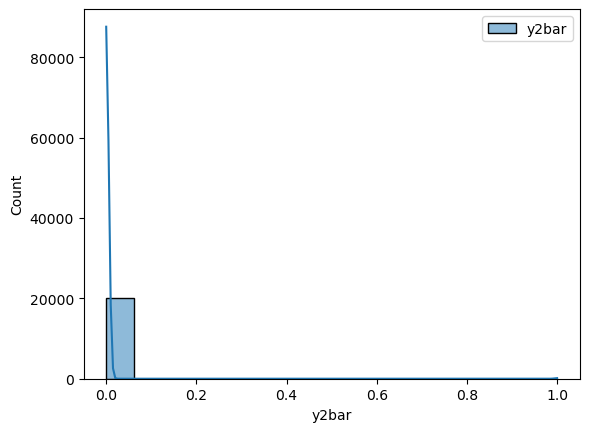

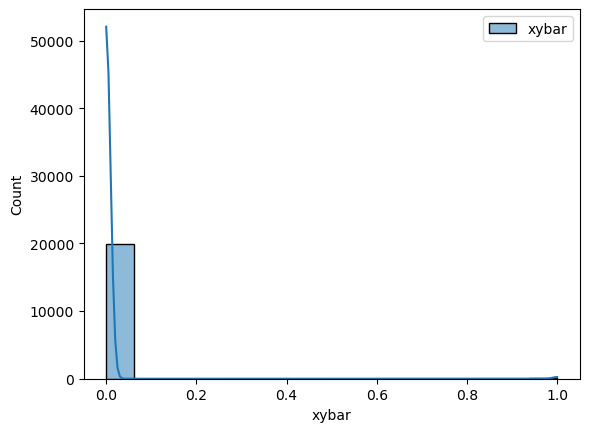

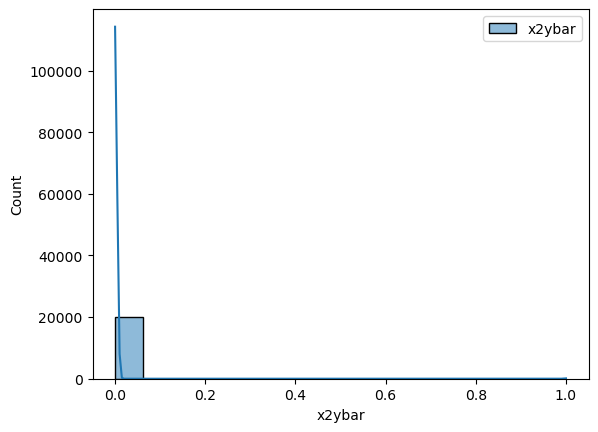

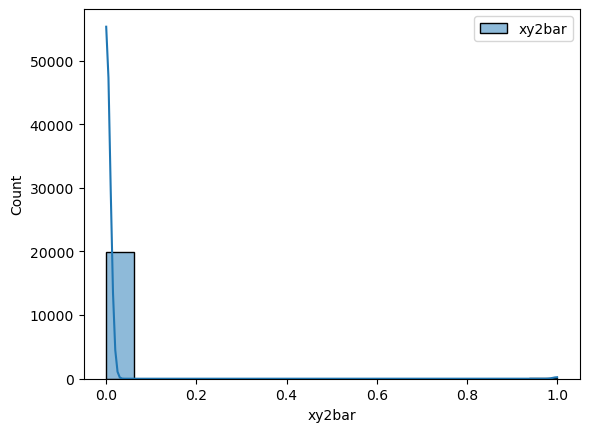

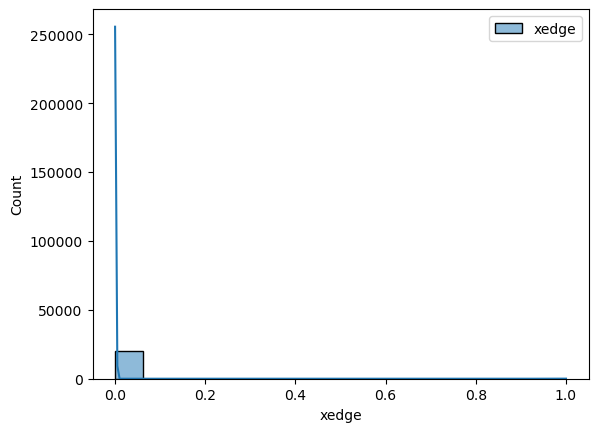

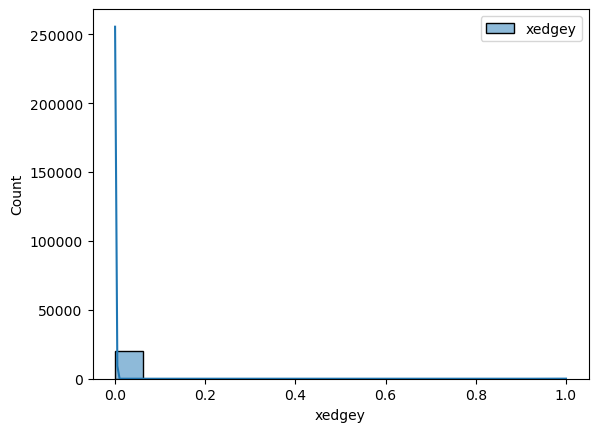

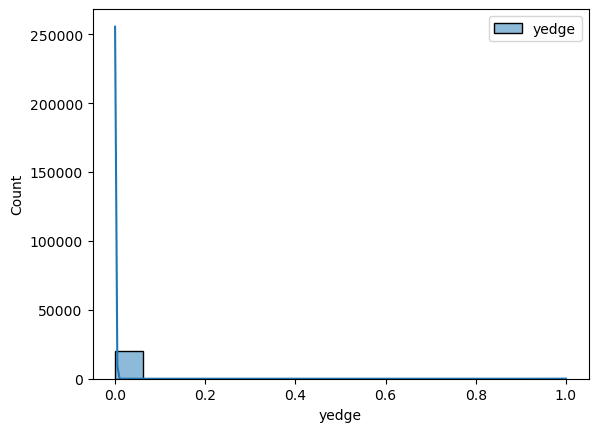

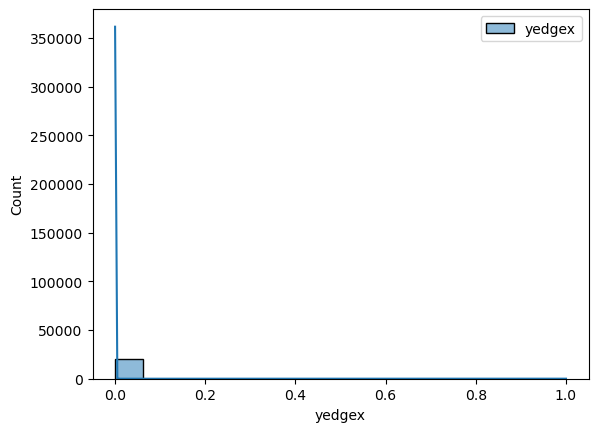

In [44]:
#checking for the distributions
for col in df.select_dtypes(include = 'number'):
    sns.histplot(df[[col]],kde = True)
    plt.xlabel(col)
    plt.show()

In [45]:
#checking for the skewness
for col in df.select_dtypes(include = 'number'):
    print(col,":",df[col].skew())

letter : -0.011246248274866023
xbox : 99.9924989686226
ybox : -0.20122214663162222
width : 99.9924989686226
height : 70.69476536507152
onpix : 57.71337150161457
xbar : 37.75958147803202
ybar : 16.130738938194774
x2bar : 11.914519595197538
y2bar : 24.193486608348206
xybar : 14.330699959011357
x2ybar : 31.577691034869282
xy2bar : 15.242481267532154
xedge : 70.6947653650715
xedgey : 70.6947653650715
yedge : 70.69476536507152
yedgex : 99.9924989686226


In [46]:
df['letter'].unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
df['letter'] = le.fit_transform(df['letter']).astype(int)

In [50]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [51]:
std = StandardScaler()

In [52]:
mmx = MinMaxScaler()

In [53]:
df[['ybox']] = std.fit_transform(df[['ybox']]).astype(int)

In [54]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [55]:
df[['xbox','width', 'height', 'onpix', 'xbar', 'ybar','x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey','yedge', 'yedgex']] = mmx.fit_transform(df[['xbox', 'width', 'height', 'onpix', 'xbar', 'ybar','x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey','yedge', 'yedgex']]).astype(int)

In [56]:
for col in df.select_dtypes(include = 'number'):
    print(col,':',df[col].unique())

letter : [19  8  3 13  6 18  1  0  9 12 23 14 17  5  2  7 22 11 15  4 21 24 16 20
 10 25]
xbox : [0 1]
ybox : [ 0  1 -1  2 -2]
width : [0 1]
height : [0 1]
onpix : [0 1]
xbar : [0 1]
ybar : [0 1]
x2bar : [0 1]
y2bar : [0 1]
xybar : [0 1]
x2ybar : [0 1]
xy2bar : [0 1]
xedge : [0 1]
xedgey : [0 1]
yedge : [0 1]
yedgex : [0 1]


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
x = data.drop("letter", axis=1)
y = data["letter"] 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (16000, 16)
Test size: (4000, 16)


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)